In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')


In [3]:
# importing dataset
df=pd.read_csv("C:\\Users\\Umesh Gupta\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<AxesSubplot:>

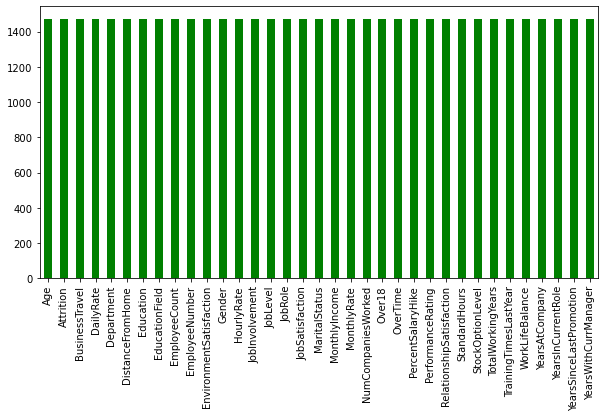

In [5]:
df.count().plot.bar(figsize=(10,5),color="g")

In [6]:
#checking shape
df.shape

(1470, 35)

In [7]:
# for checking 0 in the dataset
df.isin([0]).sum()

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked          197
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel            631
TotalWorkingYears            11
TrainingTimesLastYear        54
WorkLifeBalance               0
YearsAtC

In [8]:
# describe is used to get basic info of the datset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
#checking unique in dataset
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

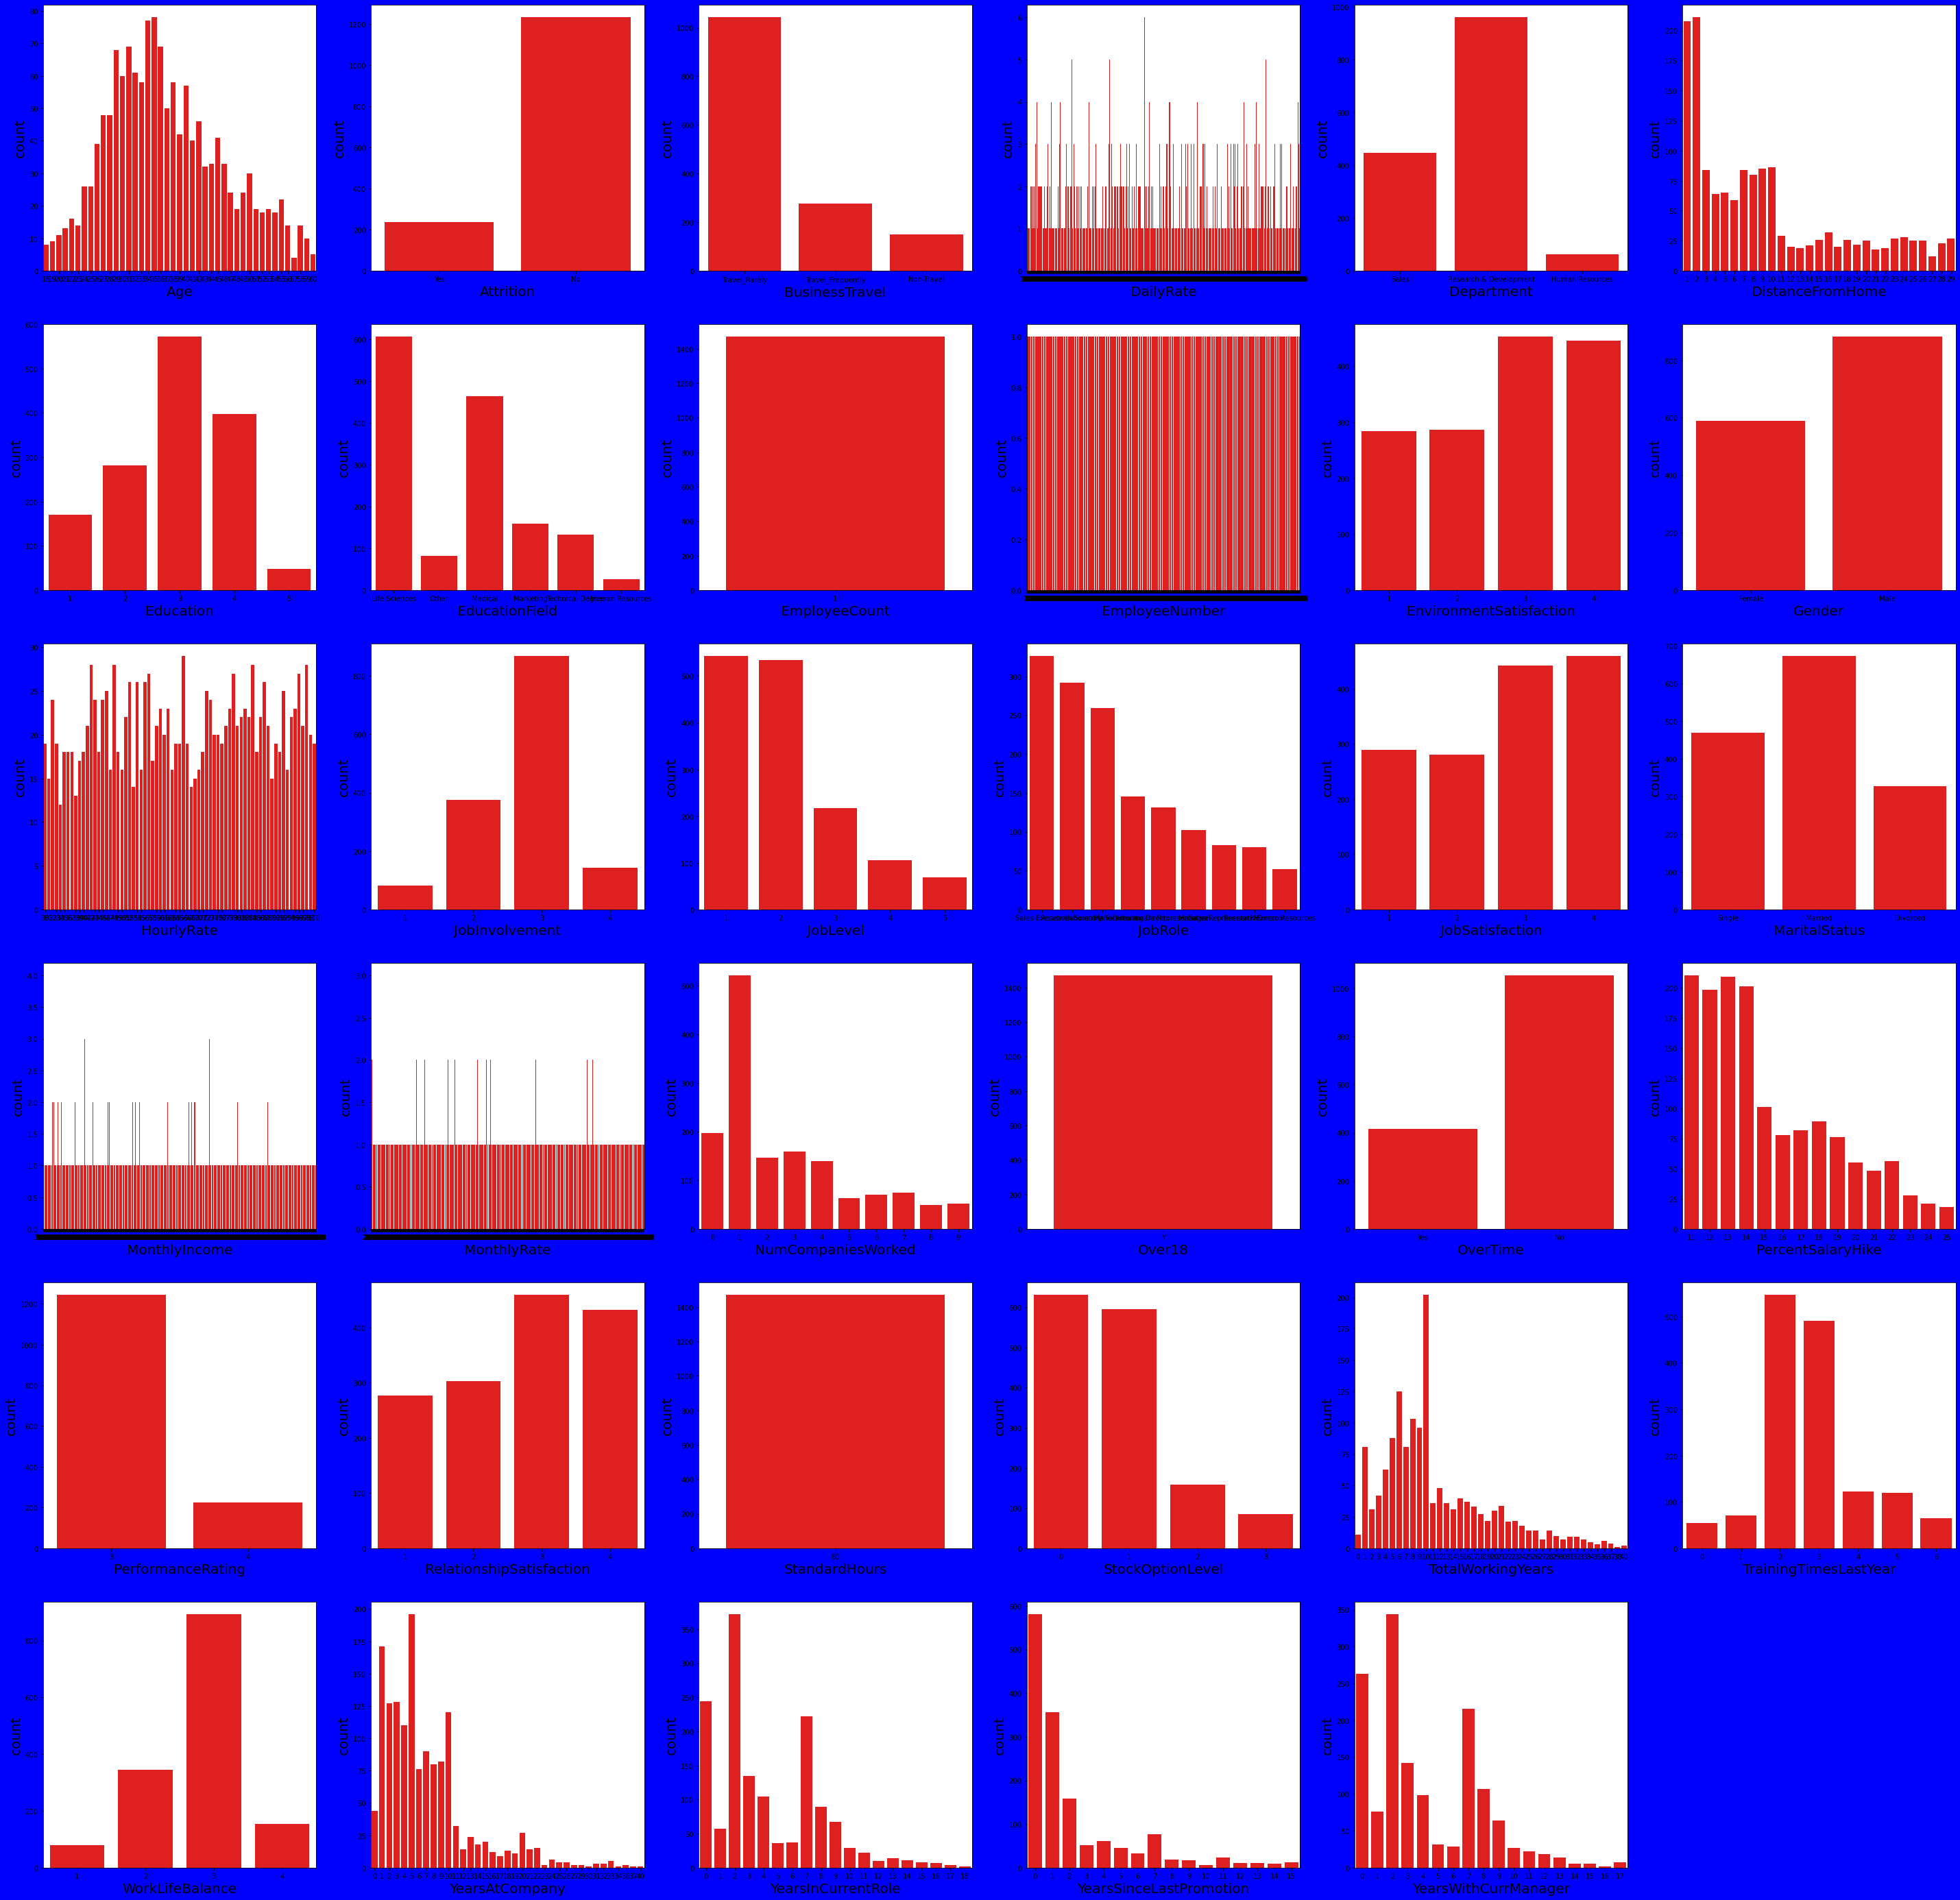

In [9]:
#univariate analysis 
plt.figure(figsize=(50,50),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=36:
        ax=plt.subplot(6,6,plotnumber)
        sns.countplot(df[column],color="red")
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
    plotnumber+=1
plt.show()

In [10]:
# checking only object data
features=[]
for i in df:
    if df[i].dtypes=="object":
        features.append(i)
features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [11]:
# to convert categorical data to numerical
label=LabelEncoder()
for i in df[features]:
    df[i]=label.fit_transform(df[i])
    
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,0,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,0,14,3,4,80,0,17,3,2,9,6,0,8


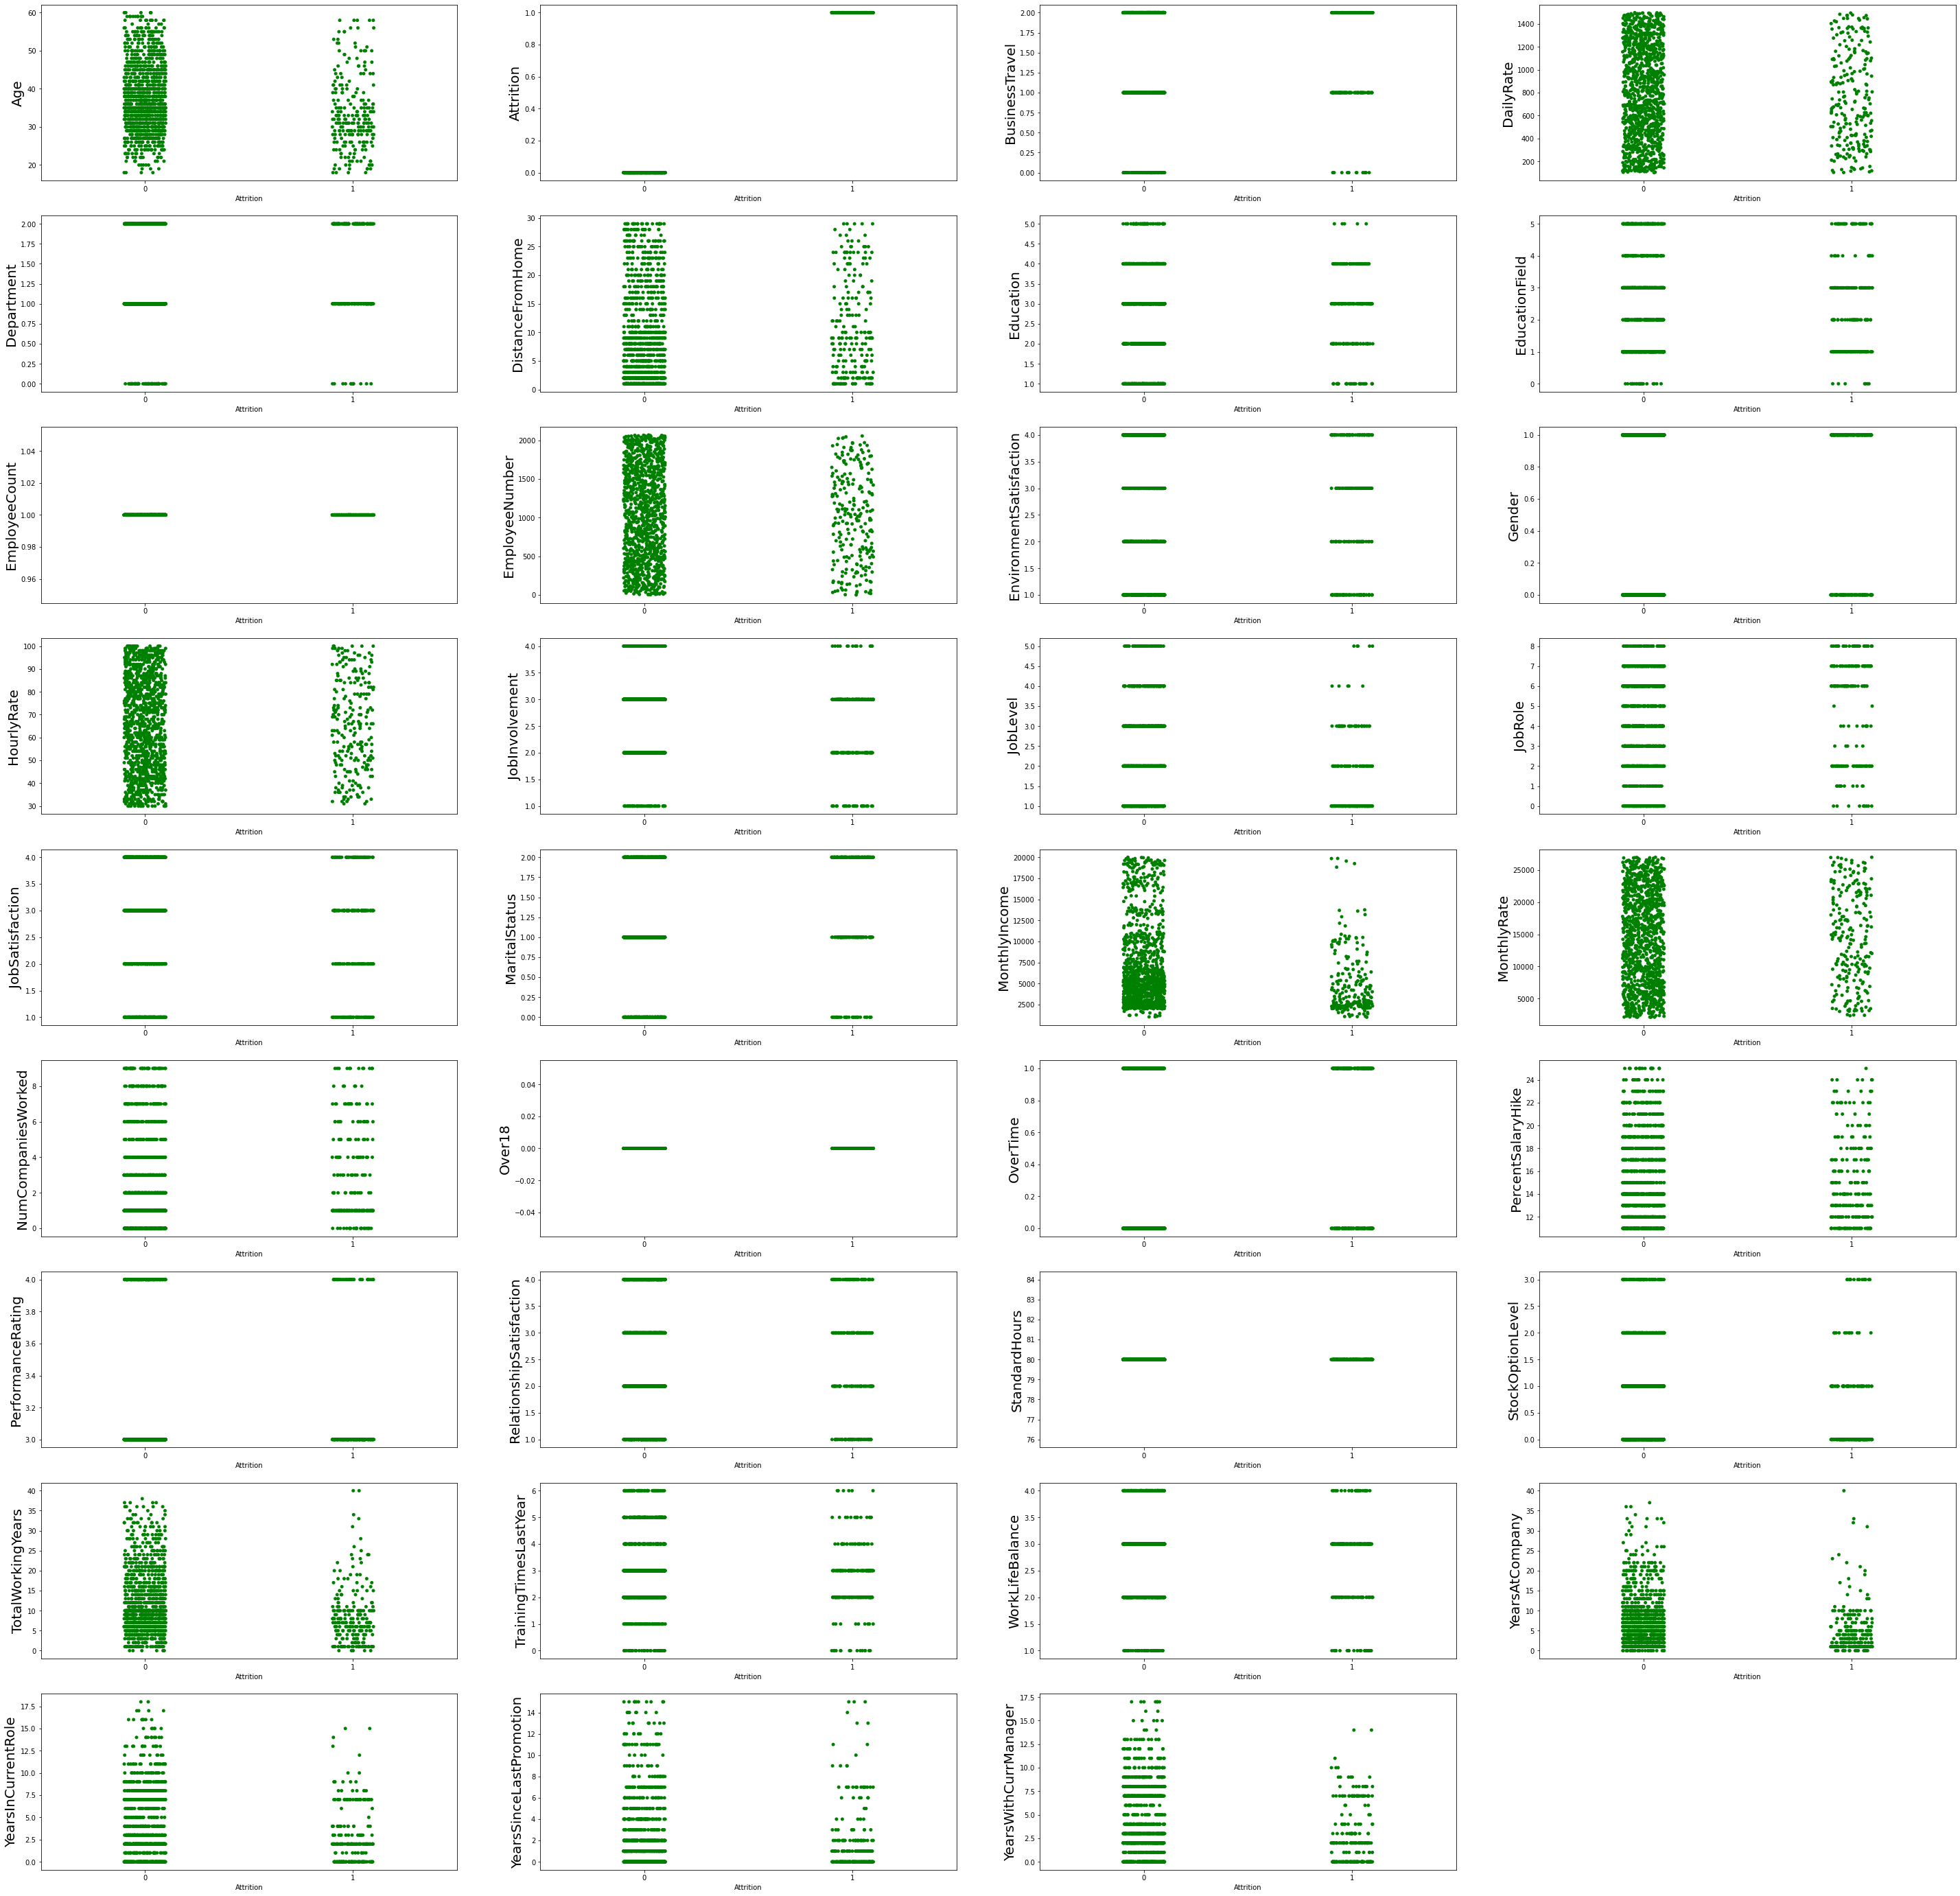

In [12]:
#bivariate analysis
plt.figure(figsize=(50,50))
plotnumber = 1
for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.stripplot(x=df["Attrition"],y=df[column],color="green")
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

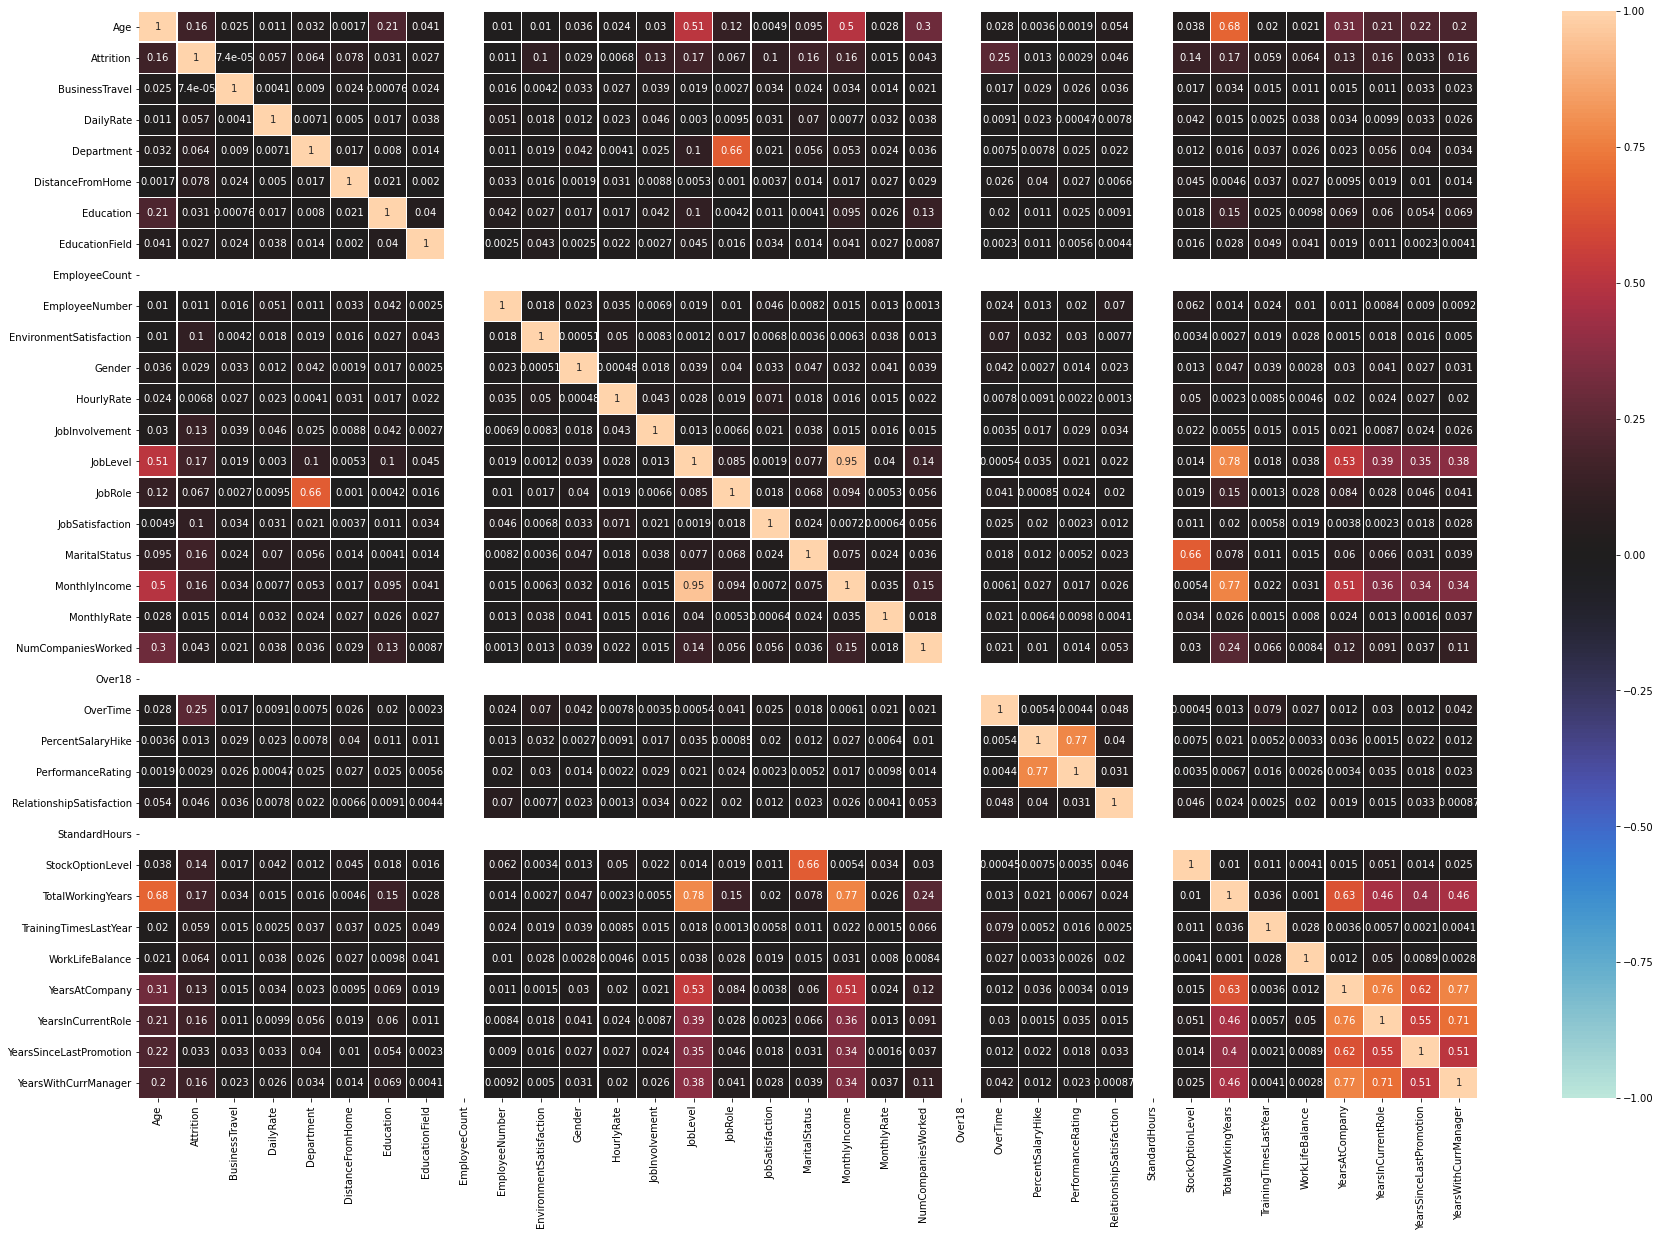

In [13]:
# multivariate analysis
df_corr=df.corr().abs()
plt.figure(figsize=(30,20))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show

In [14]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

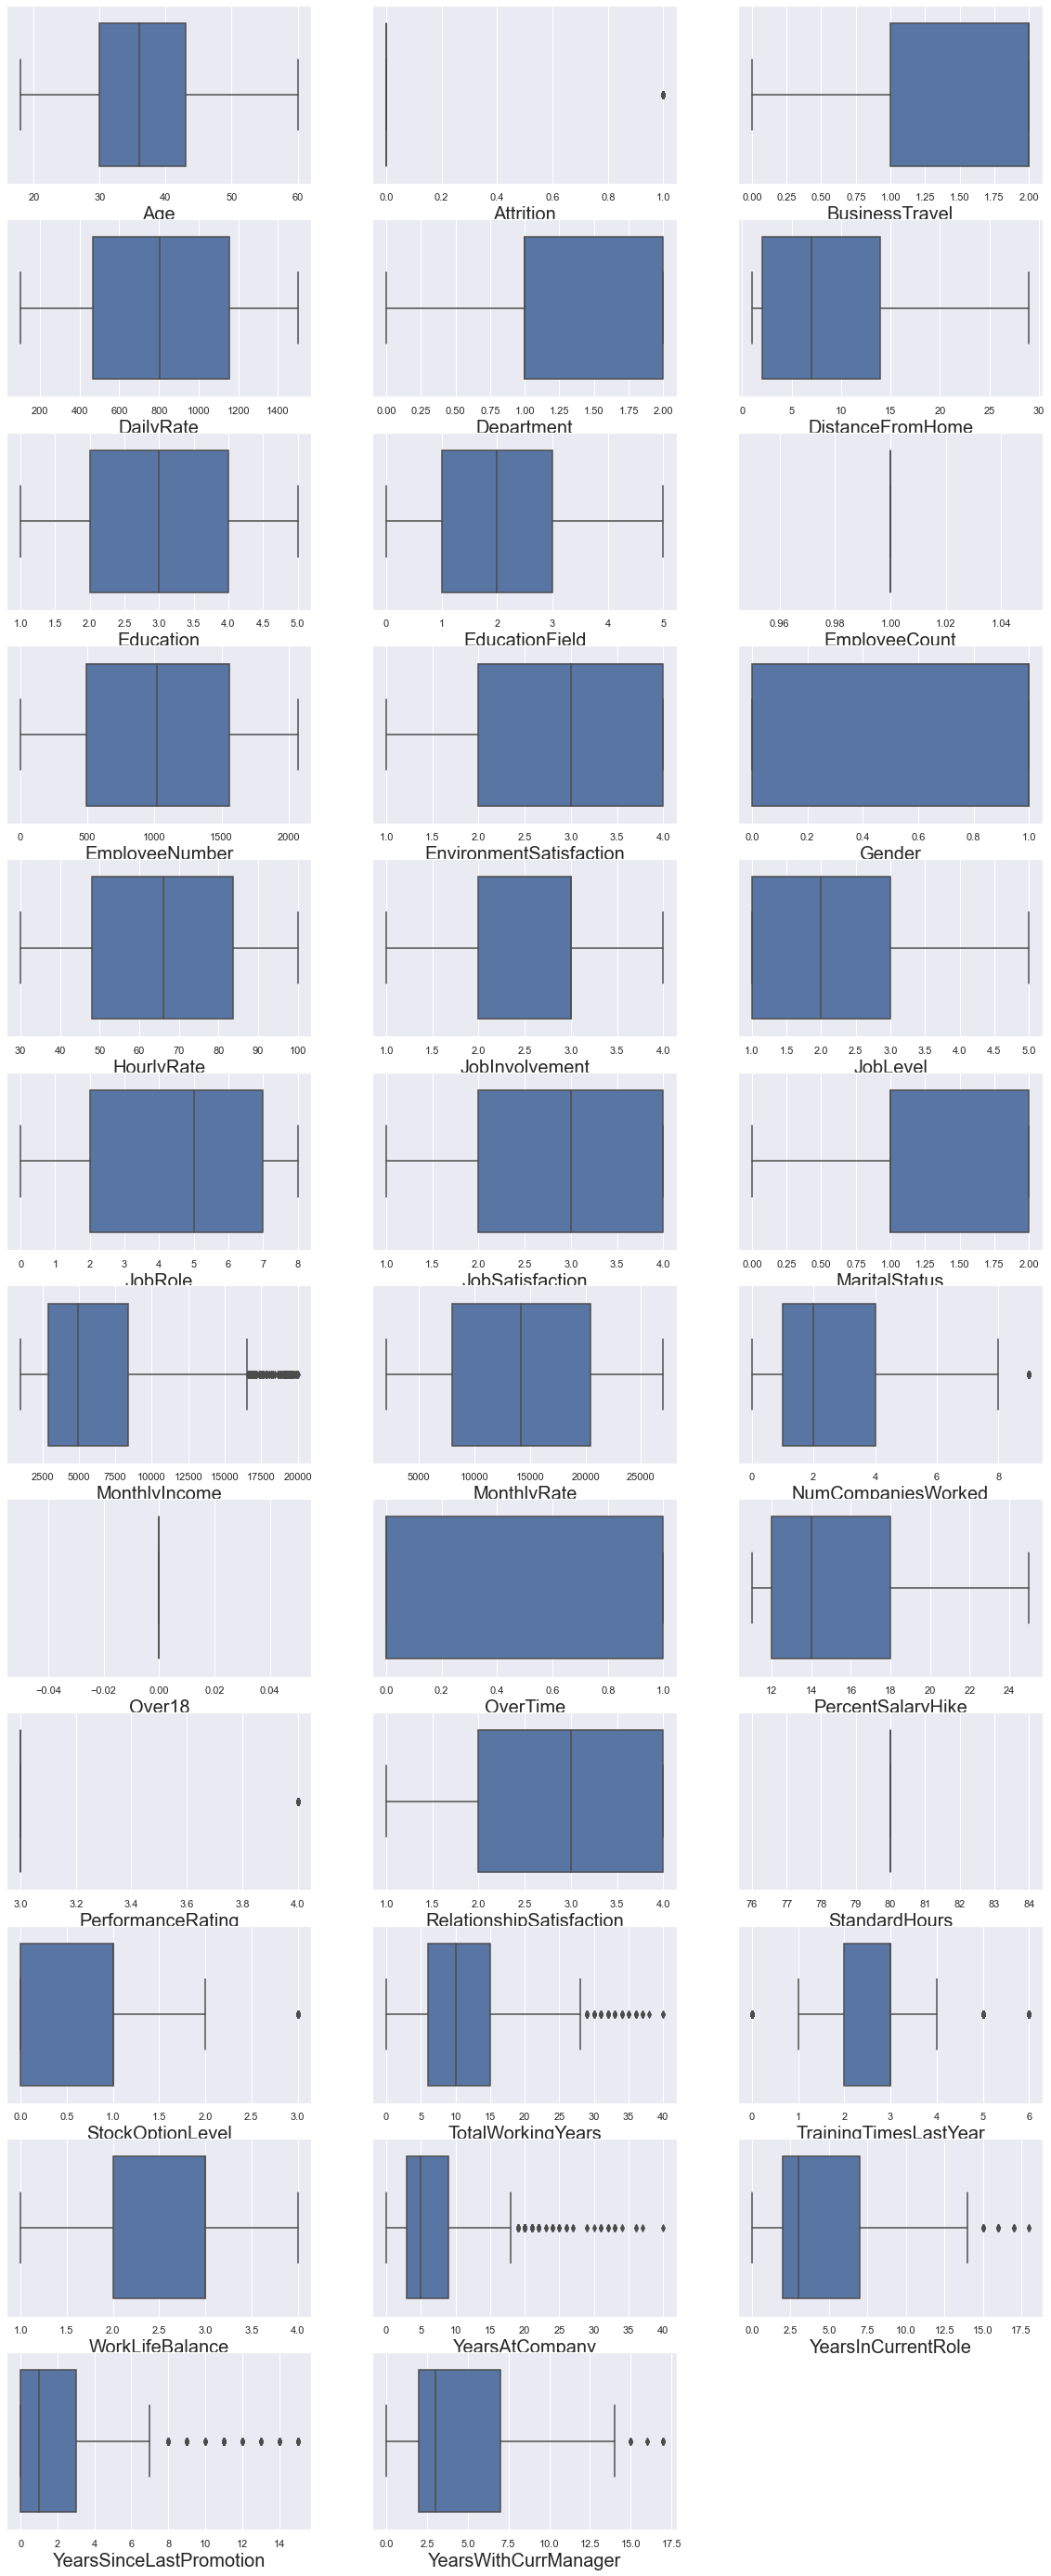

In [111]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(20,50))
plotnumber = 1
for column in df:
    if plotnumber<=36:
        ax=plt.subplot(12,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [13]:
#for removing outliers
data=df[df["MonthlyIncome"]< df["MonthlyIncome"].quantile(0.96)]

In [14]:
#i can afford to loose this much data
data.shape

(1411, 35)

In [16]:
#for checking skewness
data.skew()

Age                         0.463482
Attrition                   1.812638
BusinessTravel             -1.413266
DailyRate                  -0.006870
Department                  0.177013
DistanceFromHome            0.930850
Education                  -0.283051
EducationField              0.560940
EmployeeCount               0.000000
EmployeeNumber              0.011562
EnvironmentSatisfaction    -0.319218
Gender                     -0.397838
HourlyRate                 -0.039161
JobInvolvement             -0.494240
JobLevel                    0.845206
JobRole                    -0.384277
JobSatisfaction            -0.328955
MaritalStatus              -0.161158
MonthlyIncome               1.352442
MonthlyRate                 0.026542
NumCompaniesWorked          1.044313
Over18                      0.000000
OverTime                    0.965708
PercentSalaryHike           0.807743
PerformanceRating           1.898952
RelationshipSatisfaction   -0.294517
StandardHours               0.000000
S

In [17]:
#for removing skewness
from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer(method='yeo-johnson')

In [18]:
features=["DistanceFromHome","MonthlyIncome","PercentSalaryHike","NumCompaniesWorked","TotalWorkingYears","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]

In [19]:
data[features]=scale.fit_transform(data[features].values)
data[features].head()

,DistanceFromHome,MonthlyIncome,PercentSalaryHike,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.493972,0.373660,-1.492515,1.626588,-0.189194,0.173304,0.227065,-1.082464,0.525938
1,0.224625,0.126432,1.673371,-0.555687,0.120781,0.826797,0.917878,0.133325,0.948043
2,-1.039532,-1.437148,0.188791,1.281304,-0.362261,-2.204830,-1.591442,-1.082464,-1.540869
3,-0.713175,-0.833353,-1.492515,-0.555687,-0.189194,0.531452,0.917878,0.944250,-1.540869
4,-1.039532,-0.525979,-0.956551,1.769140,-0.550895,-0.943742,-0.434159,0.646964,-0.379673


In [22]:
#skewness removed for only categorical column
data.skew()

Age                         0.463482
Attrition                   1.812638
BusinessTravel             -1.413266
DailyRate                  -0.006870
Department                  0.177013
DistanceFromHome           -0.012232
Education                  -0.283051
EducationField              0.560940
EmployeeCount               0.000000
EmployeeNumber              0.011562
EnvironmentSatisfaction    -0.319218
Gender                     -0.397838
HourlyRate                 -0.039161
JobInvolvement             -0.494240
JobLevel                    0.845206
JobRole                    -0.384277
JobSatisfaction            -0.328955
MaritalStatus              -0.161158
MonthlyIncome               0.023723
MonthlyRate                 0.026542
NumCompaniesWorked          0.017535
Over18                      0.000000
OverTime                    0.965708
PercentSalaryHike           0.114808
PerformanceRating           1.898952
RelationshipSatisfaction   -0.294517
StandardHours               0.000000
S

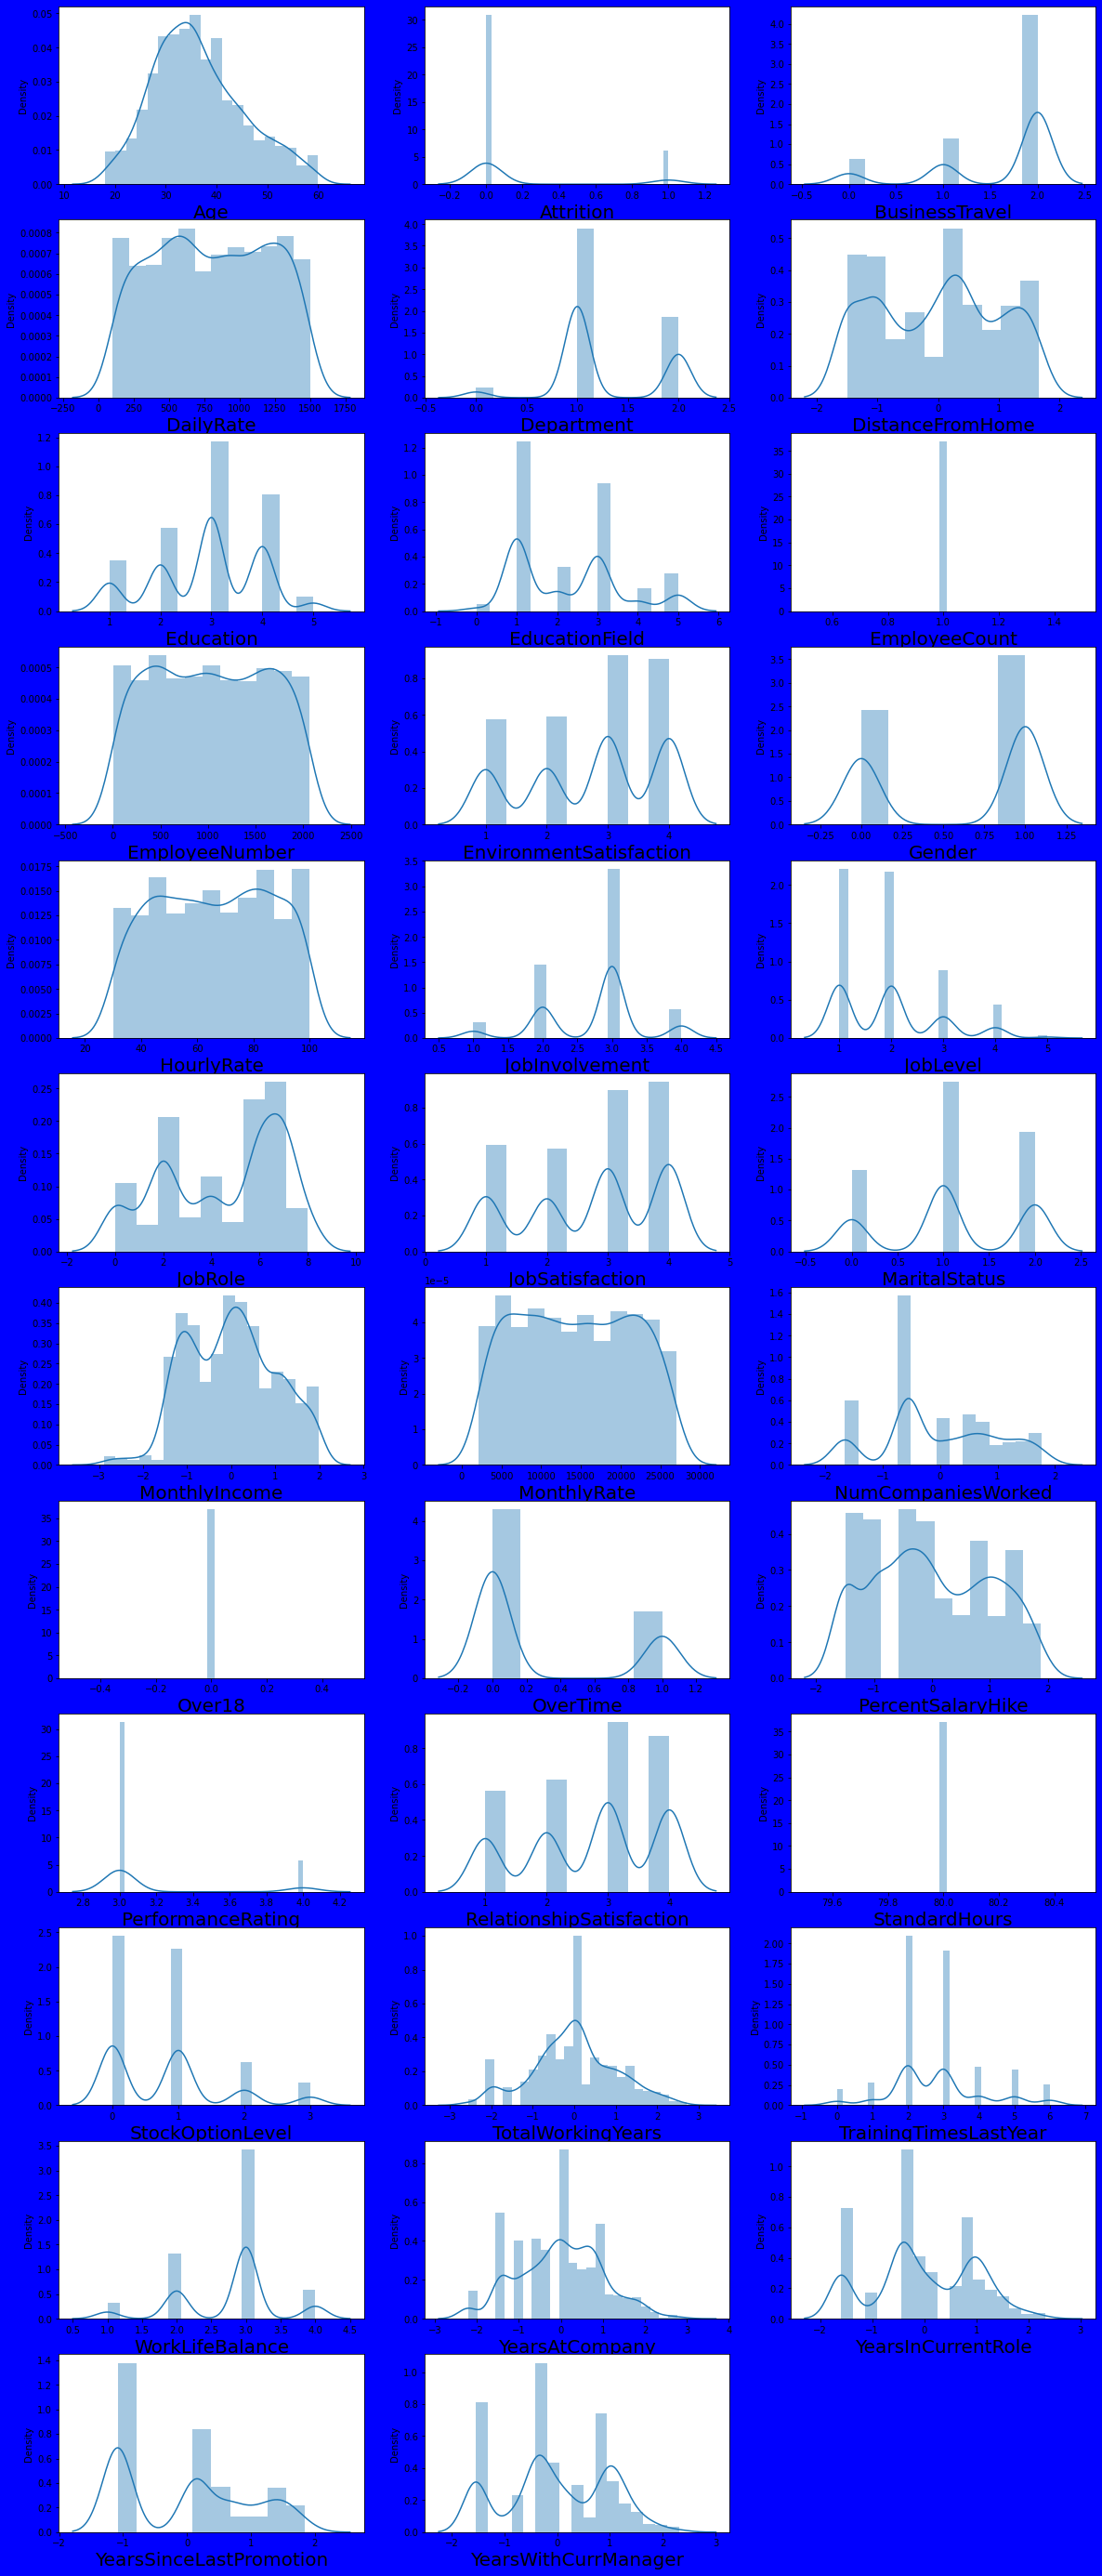

In [20]:
plt.figure(figsize=(20,50),facecolor='blue')
plotnumber = 1
for column in data:
    if plotnumber<=36:
        ax=plt.subplot(12,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

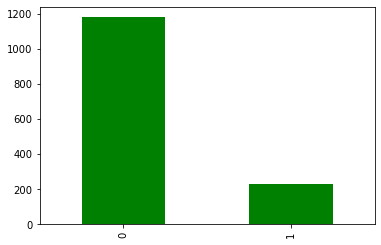

In [23]:
#checking balacing in label
data.Attrition.value_counts().plot.bar(color='green')

In [24]:
from sklearn.utils import resample

In [25]:
z=data[data.Attrition==0]
a=data[data.Attrition==1]

In [26]:
up=resample(a,replace=True,n_samples=len(z),random_state=0)

In [27]:
new_df=pd.concat([z,up])
new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,1,279,1,0.224625,1,1,1,2,3,1,61,2,2,6,2,1,0.126432,24907,-0.555687,0,0,1.673371,4,4,80,1,0.120781,3,3,0.826797,0.917878,0.133325,0.948043
3,33,0,1,1392,1,-0.713175,4,1,1,5,4,0,56,3,1,6,3,1,-0.833353,23159,-0.555687,0,1,-1.492515,3,3,80,0,-0.189194,3,3,0.531452,0.917878,0.944250,-1.540869
4,27,0,2,591,1,-1.039532,1,3,1,7,1,1,40,3,1,2,2,1,-0.525979,16632,1.769140,0,0,-0.956551,3,4,80,1,-0.550895,3,3,-0.943742,-0.434159,0.646964,-0.379673
5,32,0,1,1005,1,-1.039532,2,1,1,8,4,1,79,3,1,2,4,2,-0.739316,11864,-1.660382,0,0,-0.510000,3,3,80,0,-0.189194,2,2,0.361999,0.917878,0.944250,0.748513
6,59,0,2,1324,1,-0.713175,3,3,1,10,3,0,81,4,1,2,1,1,-0.986652,9964,0.807184,0,1,1.272011,4,1,80,3,0.394118,3,2,-1.432343,-1.591442,-1.082464,-1.540869


<AxesSubplot:>

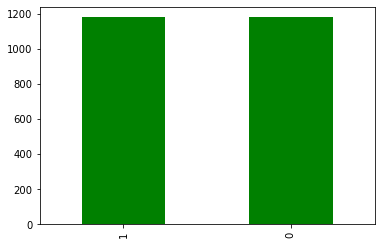

In [28]:
#label balanced
new_df.Attrition.value_counts().plot.bar(color='green')

In [29]:
x=new_df.drop(columns=['Attrition','Over18','HourlyRate','EmployeeNumber','EmployeeCount','StandardHours',"MonthlyIncome"],axis=1)
y=new_df['Attrition']

# model building

In [30]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scaling dataset

In [31]:
scale=StandardScaler()
x_scaled=scale.fit_transform(x)


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=50)

# xgbdt

In [33]:
xg = XGBClassifier (verbosity=0)
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [34]:
y_pred=xg.predict(x_test)

In [35]:

print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       344
           1       0.93      1.00      0.96       364

    accuracy                           0.96       708
   macro avg       0.97      0.96      0.96       708
weighted avg       0.96      0.96      0.96       708



In [36]:
accuracy_score(y_test,y_pred)

0.961864406779661

In [37]:
cross_val_score(xg,x_scaled,y,cv=3).mean()

0.9533502968617472

In [38]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[317  27]
 [  0 364]]


# gbdt

In [39]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [40]:
y_pred=gb.predict(x_test)

In [41]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.93      0.86      0.90       344
           1       0.88      0.94      0.91       364

    accuracy                           0.90       708
   macro avg       0.91      0.90      0.90       708
weighted avg       0.90      0.90      0.90       708



In [42]:
accuracy_score(y_test,y_pred)

0.902542372881356

In [43]:
cross_val_score(gb,x_scaled,y,cv=3).mean()

0.8770144189991518

In [44]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[297  47]
 [ 22 342]]


# decison tree

In [45]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
y_pred=dt.predict(x_test)

In [47]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.83      0.90       344
           1       0.86      0.99      0.92       364

    accuracy                           0.91       708
   macro avg       0.92      0.91      0.91       708
weighted avg       0.92      0.91      0.91       708



In [48]:
accuracy_score(y_test,y_pred)

0.9110169491525424

In [49]:
cross_val_score(dt,x_scaled,y,cv=3).mean()

0.9003392705682782

In [50]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[285  59]
 [  4 360]]


# adaboost classifier

In [51]:
ad =AdaBoostClassifier()
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [52]:
y_pred=ad.predict(x_test)

In [53]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       344
           1       0.82      0.80      0.81       364

    accuracy                           0.81       708
   macro avg       0.81      0.81      0.81       708
weighted avg       0.81      0.81      0.81       708



In [54]:
accuracy_score(y_test,y_pred)

0.806497175141243

In [55]:
cross_val_score(ad,x_scaled,y,cv=3).mean()

0.7900763358778627

In [56]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[279  65]
 [ 72 292]]


# xgbdt is my best model

In [57]:
grid_params= {"n_estimators":[10,20,50,100,200,],
              "random_state":[0,10,15,20,40],
              "max_depth":[2,4,6,8,10],
              "criterion":["gini","entropy"]
}

In [58]:
grid_search = GridSearchCV(estimator = xg,
                          param_grid = grid_params,
                          cv=3,n_jobs=-1)

In [61]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [62]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0}

In [63]:
xg = XGBClassifier (criterion= "gini",max_depth=6,n_estimator=100,random_state=0)
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=100, n_estimators=100, n_jobs=8, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [64]:
y_pred=xg.predict(x_test)

In [65]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       344
           1       0.93      1.00      0.96       364

    accuracy                           0.96       708
   macro avg       0.97      0.96      0.96       708
weighted avg       0.96      0.96      0.96       708



In [66]:
accuracy_score(y_test,y_pred)

0.961864406779661

In [67]:
cross_val_score(xg,x_scaled,y,cv=3).mean()

0.9533502968617472

In [68]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[317  27]
 [  0 364]]


# auc & roc curve

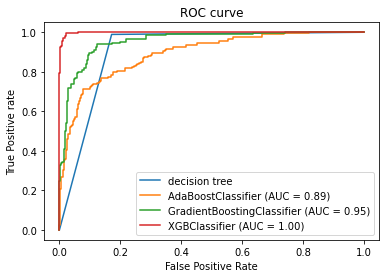

In [69]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
disp = plot_roc_curve(dt,x_test,y_test, label='decision tree')

plot_roc_curve(ad,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xg,x_test,y_test,ax=disp.ax_)


plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

In [70]:
import pickle
filename='hr_analytics.pk1'
pickle.dump(xg,open(filename,'wb'))